# Homework 2: Programming with `Numpy` and `Pandas`

### About this assignment:

The main purpose of this assignment is to practice your Python skills.
This assignment covers two python packages, `numpy` and `pandas`, which we'll be using throughout the course. 
For some of you, Python/numpy/pandas will be familiar; for others, it will be new. 
While ECE 4420/6420 is a machine learning course rather than a programming course, programming will be an essential but less challenging part of it.

Also, as part of this assignment you will likely need to consult the documentation for various Python packages we're using. This is, of course, totally OK and in fact strongly encouraged. 
Reading and interpreting documentation is an important skill, and in fact is one of the skills this assignment is meant to assess.

## Recommending tutorials for HW 2

1. [Python NumPy Tutorial for Beginners](https://www.youtube.com/watch?v=QUT1VHiLmmI)
2. [Python Pandas Data Science Tutorial](https://www.youtube.com/watch?v=vmEHCJofslg)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Exercise 1: Loading files with Pandas
rubric={points:20}

When working with tabular data, you will typically be creating Pandas dataframes by reading data from .csv files using `pd.read_csv()`. The documentation for this function is available [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In the "data" folder in this homework repository there are 2 different .csv files named `wine_#.csv/.txt`. 
Look at each of these files and use `pd.read_csv()` to load these data so that they resemble the following:

| Bottle | Grape | Origin | Alcohol | pH | Colour | Aroma |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 1 |  Chardonnay | Australia | 14.23 | 3.51 | White | Floral |
| 2 |  Pinot Grigio | Italy | 13.20 | 3.30 | White | Fruity |
| 3 |  Pinot Blanc | France | 13.16 | 3.16 | White | Citrus |
| 4 |  Shiraz | Chile | 14.91 | 3.39 | Red | Berry |
| 5 |  Malbec | Argentina | 13.83 | 3.28 | Red | Fruity |

Hint: 
1. Read two files and assign them to `df1` and `df2` accordingly.
2. You may use [pandas.read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

You are provided with tests that use `df.equals()` to check that all the dataframes are identical. If you're in a situation where the two dataframes look identical but `df.equals()` is returning `False`, it may be an issue of types - try checking `df.index`, `df.columns`, or `df.info()`.

In [2]:
df1 = None
df2 = None

# BEGIN YOUR CODE HERE
df1 = pd.read_csv('wine_1.csv')
df2 = pd.read_csv('wine_2.txt', delimiter='\t')

# END YOUR CODE HERE

assert df1.equals(df2), f"df1 not equal to df2"
print("All tests passed.")

All tests passed.


---

## Exercise 2: The Titanic dataset

Rubric={points:52}

The file *titanic.csv* contains data of 1309 passengers who were on the Titanic's unfortunate voyage. For each passenger, the following data are recorded:

* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* boat - Lifeboat (if survived)
* body - Body number (if did not survive and body was recovered)

In this exercise you will perform a number of wrangling operations to manipulate and extract subsets of the data.

Note: many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary.

#### 2(a)
rubric={points:3}

Load the `titanic.csv` dataset into a pandas dataframe named `titanic_df`.

In [3]:
titanic_df = None

# BEGIN YOUR CODE HERE
titanic_df = pd.read_csv('titanic.csv')

# END YOUR CODE HERE

In [4]:
assert set(titanic_df.columns) == set([
    "pclass",
    "survived",
    "name",
    "sex",
    "age",
    "sibsp",
    "parch",
    "ticket",
    "fare",
    "cabin",
    "embarked",
    "boat",
    "body",
    "home.dest",
]), "All required columns are not present"
assert len(titanic_df.index) == 1309, "Wrong number of rows in dataframe"
print("Success")

Success


#### 2(b)
rubric={points:3}

The column names `sibsp` and `parch` are not very descriptive. Use [df.rename()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) to rename these columns to `siblings_spouses` and `parents_children` respectively.

In [5]:
# BEGIN YOUR CODE HERE
titanic_df = titanic_df.rename(columns={"sibsp":"siblings_spouses","parch":"parents_children"})


# END YOUR CODE HERE

In [6]:
assert set(["siblings_spouses", "parents_children"]).issubset(
    titanic_df.columns), "Column names were not changed properly"
print("Success")

Success


#### 2(c)
rubric={points:3}

We will practice indexing different subsets of the dataframe in the following questions.

Select the column `age` using single bracket notation `[]`. What type of object is returned?

In [7]:
# BEGIN YOUR CODE HERE
titanic_df['age']

# END YOUR CODE HERE

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

#### 2(d)
rubric={points:3}

Now select the `age` using double bracket notation `[[]]`. What type of object is returned?

In [8]:
# BEGIN YOUR CODE HERE
titanic_df[['age']]

# END YOUR CODE HERE

,age
0,29.0000
1,0.9167
2,2.0000
3,30.0000
4,25.0000
...,...
1304,14.5000
1305,NaN
1306,26.5000
1307,27.0000


#### 2(e)
rubric={points:3}

Select the columns `pclass`, `survived`, and `age` using a single line of code.

In [9]:
# BEGIN YOUR CODE HERE
titanic_df[['pclass','survived','age']]


# END YOUR CODE HERE

,pclass,survived,age
0,1,1,29.0000
1,1,1,0.9167
2,1,0,2.0000
3,1,0,30.0000
4,1,0,25.0000
...,...,...,...
1304,3,0,14.5000
1305,3,0,NaN
1306,3,0,26.5000
1307,3,0,27.0000


#### 2(f)
rubric={points:4}

Use the [iloc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) method to obtain the first 5 rows of the columns `name`, `sex` and `age` using a single line of code.

In [10]:
# BEGIN YOUR CODE HERE
titanic_df.iloc[0:5, 2:5]

# END YOUR CODE HERE

,name,sex,age
0,"Allen, Miss. Elisabeth Walton",female,29.0000
1,"Allison, Master. Hudson Trevor",male,0.9167
2,"Allison, Miss. Helen Loraine",female,2.0000
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


#### 2(g)
rubric={points:3}

Now use the [loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) method to obtain the first 5 rows of the columns `name`, `sex` and `age` using a single line of code.

In [11]:
# BEGIN YOUR CODE HERE
titanic_df.loc[0:4, 'name':'age']

# END YOUR CODE HERE

,name,sex,age
0,"Allen, Miss. Elisabeth Walton",female,29.0000
1,"Allison, Master. Hudson Trevor",male,0.9167
2,"Allison, Miss. Helen Loraine",female,2.0000
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


#### 2(h)
rubric={points:2}

How many passengers survived (`survived = 1`) the disaster? 

Hints: 
1. try using [df.query()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html) or `[]` notation to subset the dataframe and then [df.shape](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) to check its size.

In [12]:
# BEGIN YOUR CODE HERE
survive_df = titanic_df.query('survived==1')
survive_df.shape[0]

# END YOUR CODE HERE

500

#### 2(i)
rubric={points:4}

How many passengers that survived the disaster (`survived = 1`) were over 60 years of age?

In [13]:
# BEGIN YOUR CODE HERE
es_df=titanic_df.query(('survived=1') and ('age > 60'))
es_df.shape[0]

# END YOUR CODE HERE

33

#### 2(j)
rubric={points:4}

What was the lowest and highest fare paid to board the titanic? Store your answers as floats in the variables `lowest` and `highest`.

Hints:
1. `min` and `max` can return the smallest and largest values.

In [14]:
lowest = None
highest = None

# BEGIN YOUR CODE HERE
lowest = titanic_df['fare'].min()
highest = titanic_df['fare'].max()

# END YOUR CODE HERE

print(lowest, highest)

0.0 512.3292


#### 2(k)
rubric={points:4}

Sort the dataframe by fare paid (most to least) and show the sorted result.

Hints:
1. try [df.sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)

In [15]:
# BEGIN YOUR CODE HERE
titanic_sort_df = titanic_df.sort_values('fare',ascending=False)

# END YOUR CODE HERE

titanic_sort_df

,pclass,survived,name,sex,age,siblings_spouses,parents_children,ticket,fare,cabin,embarked,boat,body,home.dest
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
113,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2,0,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S,NaN,NaN,Belfast
384,2,0,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S,NaN,NaN,Belfast
581,2,0,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S,NaN,NaN,Belfast
410,2,0,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,NaN,NaN,Belfast


#### 2(l)
rubric={points:3}

Save the sorted dataframe to a .csv file called 'titanic_fares.csv' using [to_csv()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html).

In [16]:
# BEGIN YOUR CODE HERE
titanic_sort_df.to_csv('titanic_fares.csv')

# END YOUR CODE HERE

#### 2(m)
rubric={points:5}

Create a scatter plot of fare (y-axis) vs. age (x-axis). 

Hints
- [matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)

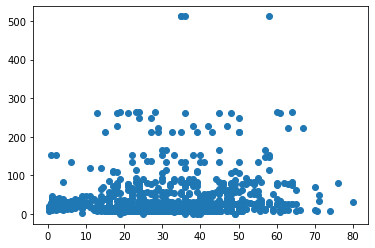

In [17]:
# BEGIN YOUR CODE HERE
plt.scatter(titanic_df['age'],titanic_df['fare'])

# END YOUR CODE HERE

#### 2(n)
rubric={points:5}

Create a bar plot of `embarked` values. 

Hints
- Make sure to name the axes and give a title to your plot. 
- You may read [value_counts](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) and [matplotlib.pyplot.bar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

<BarContainer object of 3 artists>

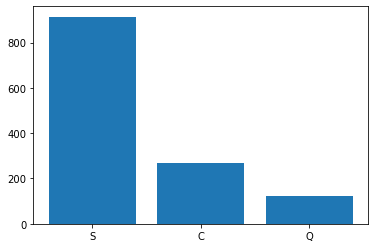

In [18]:
# BEGIN YOUR CODE HERE
em_data = titanic_df.embarked.value_counts()
names = list(em_data.keys())
vals = list(em_data.values)
plt.bar(names,vals)
# plt.bar(titanic_df['embarked'])

# END YOUR CODE HERE

---

## Exercise 3: Treasure Hunt

Rubric={points:18}

In this exercise, we will generate various collections of objects either as a list, a tuple, or a dictionary. Your task is to inspect the objects and look for treasure, which in our case is a particular object: **the character "T"**. 

**Your tasks:**

For each of the following cases, index into the Python object to obtain the "T" (for Treasure). 

> Please do not modify the original line of code that generates `x` (though you are welcome to copy it). You are welcome to answer this question "manually" or by writing code - whatever works for you. However, your submission should always end with a line of code that prints out `'T'` at the end (because you've found it). 

In [19]:
import string

letters = string.ascii_uppercase

The first one is done for you as an example.

#### Example question

In [20]:
x = ("nothing", {-i: l for i, l in enumerate(letters)})
x

('nothing',
 {0: 'A',
  -1: 'B',
  -2: 'C',
  -3: 'D',
  -4: 'E',
  -5: 'F',
  -6: 'G',
  -7: 'H',
  -8: 'I',
  -9: 'J',
  -10: 'K',
  -11: 'L',
  -12: 'M',
  -13: 'N',
  -14: 'O',
  -15: 'P',
  -16: 'Q',
  -17: 'R',
  -18: 'S',
  -19: 'T',
  -20: 'U',
  -21: 'V',
  -22: 'W',
  -23: 'X',
  -24: 'Y',
  -25: 'Z'})

**Example answer**:

In [21]:
x[1][-19]

'T'

> Note: In these questions, the goal is not to understand the code itself, which may be confusing. Instead, try to probe the types of the various objects. For example `type(x)` reveals that `x` is a tuple, and `len(x)` reveals that it has two elements. Element 0 just contains "nothing", but element 1 contains more stuff, hence `x[1]`. Then we can again probe `type(x[1])` and see that it's a dictionary. If you `print(x[1])` you'll see that the letter "T" corresponds to the key -19, hence `x[1][-19]`.

#### 3(a)
rubric={points:6}

Return the position(index) of 'T' when you find 'T'.

In [22]:
# Do not modify this cell
x = [
    [letters[i] for i in range(26) if i % 2 == 0],
    [letters[i] for i in range(26) if i % 2 == 1],
]
x

[['A', 'C', 'E', 'G', 'I', 'K', 'M', 'O', 'Q', 'S', 'U', 'W', 'Y'],
 ['B', 'D', 'F', 'H', 'J', 'L', 'N', 'P', 'R', 'T', 'V', 'X', 'Z']]

In [23]:
# BEGIN YOUR CODE HERE
x[1][9]

# END YOUR CODE HERE

'T'

#### 3(b)
rubric={points:6}

Return the position(index) of 'T' when you find 'T'.

In [24]:
# Do not modify this cell
np.random.seed(1)
x = np.random.choice(list(set(letters) - set("T")),
                     size=(100, 26),
                     replace=True)
x[np.random.randint(100), np.random.randint(26)] = "T"

In [25]:
# BEGIN YOUR CODE HERE
result = np.where(x=='T')
coord = list(zip(result[0],result[1]))
x[coord[0][0]][coord[0][1]]
# END YOUR CODE HERE

'T'

#### 3(c)
rubric={points:6}

In [26]:
# Do not modify this cell
n = 26
x = dict()
for i in range(n):
    x[string.ascii_lowercase[i]] = {
        string.ascii_lowercase[(j + 1) % n]:
        [[letters[j]] if j - 2 == i else None]
        for j in range(n)
    }

In [27]:
# BEGIN YOUR CODE HERE

x['r']['u'][0][0]


# END YOUR CODE HERE

'T'

---

## Submission instructions 

rubric={points:10}

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment at Canvas. 
4. Finish the corresponding reflection survey.